In [250]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings
warnings.filterwarnings('ignore')

In [251]:
df = pd.read_pickle('Itens.pkl')
df = df[df['NewFamília'].isin([' - Feixe tubular'])]

In [252]:
df.head(2)

,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,MESSAGES,DESCRIPTION,TZONE,CURRENCY,ATTACHMENTS,MEPP_x,RECURSAL_PERIOD,OPPORT_TYPE_DESC,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC
81965,7002201134,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2018-10-16,1 - Todos,X,Feixe tubular para permutador,Brazil - Distrito Federal,BRL,"{'DESCRIPTION': 'Adendo A Anexo 4', 'PHIO_OBJI...",SEM MEPP,2019-01-29,LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-01-22 09:54:52,2018-10-16 13:00:00,2018-09-29 12:41:52,2018-11-06 13:30:00,2018-11-06 13:30:00,2018-11,0001,FEIXE TUBULAR ASME SB 171 (UNS C70600) P,12191129,98010915.0,3.0,EA,Each,2018-12-17,NaN,NaN,NaN,M-40 - Sistemas de distribuição e condicioname...,- Feixe tubular,Crítica,Componentes especialmente fabricados para os p...,Bens,60549474000119,ENGEMATEX EQUIPAMENTOS INDUSTRIAIS LTDA,NaN,3.0,25346.0,80387.99,2018-11-06,11:29:15,Disqualification Technical Opinion
81966,7002201134,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2018-10-16,1 - Todos,X,Feixe tubular para permutador,Brazil - Distrito Federal,BRL,"{'DESCRIPTION': 'Adendo A Anexo 4', 'PHIO_OBJI...",SEM MEPP,2019-01-29,LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-01-22 09:54:52,2018-10-16 13:00:00,2018-09-29 12:41:52,2018-11-06 13:30:00,2018-11-06 13:30:00,2018-11,0001,FEIXE TUBULAR ASME SB 171 (UNS C70600) P,12191129,98010915.0,3.0,EA,Each,2018-12-17,NaN,NaN,NaN,M-40 - Sistemas de distribuição e condicioname...,- Feixe tubular,Crítica,Componentes especialmente fabricados para os p...,Bens,60425857000185,APEMA EQUIPAMENTOS INDUSTRIAIS LTDA,NaN,3.0,31125.0,98716.82,2018-11-06,08:54:40,Disqualification Technical Opinion


In [253]:
df.TOTAL_VALUE.dropna(inplace=True)

In [254]:
dict_target = {

'Disqualification Technical Opinion': 0,
'Disqualification Excessive Price': 0,
'Disqualification Over Estimated': 0,
'Renunciation': 0,
'Declassification Proposal Invalid': 0,
'Disability - Technical qualification.': 0,
'Disability - Financial Economic Capacity.': 0,
'Did Not Present': 0,
'Disqualification Price unenforceable': 0,
'Disability - Absence of Response.': 0,
'Supplier disqualified by High GRI': 0,
'Disqualification - Breach of notice': 0,
'Desclassification - Current administrative sanctio': 0,
'Disability – Acquisit. of Rights and Contraction o': 0,
'Disqualification - Notice': 0,
'Disability - Supplier IDF below required': 0,
'Featured Quotation':1,
'Awarded':2,
'Accepts':2,
'Enabled':2,
'Homologated':2
}

In [255]:
dict_target_2 = {

'Disqualification Technical Opinion': 0,
'Disqualification Excessive Price': 0,
'Disqualification Over Estimated': 0,
'Renunciation': 0,
'Declassification Proposal Invalid': 0,
'Disability - Technical qualification.': 0,
'Disability - Financial Economic Capacity.': 0,
'Did Not Present': 0,
'Disqualification Price unenforceable': 0,
'Disability - Absence of Response.': 0,
'Supplier disqualified by High GRI': 0,
'Disqualification - Breach of notice': 0,
'Desclassification - Current administrative sanctio': 0,
'Disability – Acquisit. of Rights and Contraction o': 0,
'Disqualification - Notice': 0,
'Disability - Supplier IDF below required': 0,
'Featured Quotation':1,
'Awarded':1,
'Accepts':1,
'Enabled':1,
'Homologated':1
}

In [256]:
df['target'] = df['CHARACTERISTIC'].replace(dict_target)

In [257]:
df['target_v2'] = df['CHARACTERISTIC'].replace(dict_target_2)

In [258]:
df['target'].unique()

array([0, 2, 1], dtype=int64)

In [259]:
df['target_v2'].unique()

array([0, 1], dtype=int64)

In [260]:
df.DESCRIPTION_UC.dropna(inplace=True)

In [261]:
df['DESCRIPTION_UC'] = df['DESCRIPTION_UC'].apply(lambda x: x.replace('FEIXE TUBULAR P/ PERMUTADOR - P-22535','FEIXE TUBULAR P/PERMUTADOR - P-22535'))
df['DESCRIPTION_UC'] = df['DESCRIPTION_UC'].apply(lambda x: x.replace('FEIXE TUBULAR PARA PERMUTADOR','FEIXE TUBULAR P/PERMUTADOR'))
df['DESCRIPTION_UC'] = df['DESCRIPTION_UC'].apply(lambda x: x.replace('FEIXE TUBULAR','FEIXE_TUBULAR'))
df['DESCRIPTION_UC'] = df['DESCRIPTION_UC'].apply(lambda x: x.replace('FEIXE ','FEIXE_TUBULAR '))

In [262]:
df = df[df['DESCRIPTION_UC'].str.contains('FEIXE_TUBULAR')]
df.to_pickle('base_kmeans.pkl')

In [263]:
df_token = df.copy()

df_token.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13664 entries, 81965 to 96919
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   OPPORT_NUM                   13664 non-null  int64         
 1   STATUS                       13664 non-null  object        
 2   OPPORT_TYPE                  13664 non-null  object        
 3   DOU_PUBL_DATE                13664 non-null  datetime64[ns]
 4   SUB_STATUS                   13664 non-null  string        
 5   MESSAGES                     11108 non-null  object        
 6   DESCRIPTION                  13664 non-null  object        
 7   TZONE                        13664 non-null  object        
 8   CURRENCY                     13664 non-null  object        
 9   ATTACHMENTS                  13664 non-null  object        
 10  MEPP_x                       13664 non-null  object        
 11  RECURSAL_PERIOD              13664 no

In [264]:
df_describe = df_token.describe(include=['O']).T
df_describe.sort_values('unique', ascending=True)
total_linhas = df_token.shape[0]
df_describe['remover'] = ( (df_describe['count'] == total_linhas) & (df_describe['unique']==1) | (df_describe['count']==0 ) )

In [265]:
#Seleciona colunas onde tenham count=0 ou count = ao total de lihas e unique = 1 
# columns_to_remove = df_describe[df_describe['remover']].index.to_list()
# #Remove arbitrariamente algumas colunas sem relevância
# columns_to_remove.extend(['CREATED_AT_DATE', 'CREATED_AT_TIME', 'DELIV_DATE', 'NUMBER_INT','ATTACHMENTS','TZONE', 'MESSAGES','DESCRIPTION',])
# columns_to_remove.extend(['RECUSADO','DOU_PUBL_DATE','SUB_STATUS','OPPORT_NUM','QUANTITY_x','YPFAMITEM','ORDERED_PROD','CHARACTERISTIC','Chave','lst_tokens_desc','OUTLIER_IQR_UL','calc_lower_limit','calc_upper_limit'])
# df_token.drop(columns_to_remove, axis='columns', inplace=True)
#columns_to_remove

In [266]:
df_token['MEPP_y'] = df_token['MEPP_y'].apply(lambda x: '1' if x=='X' else '0')

In [267]:
df_token.head(1)

,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,MESSAGES,DESCRIPTION,TZONE,CURRENCY,ATTACHMENTS,MEPP_x,RECURSAL_PERIOD,OPPORT_TYPE_DESC,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC,target,target_v2
81965,7002201134,E0008 - Habilitação Concluída,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2018-10-16,1 - Todos,X,Feixe tubular para permutador,Brazil - Distrito Federal,BRL,"{'DESCRIPTION': 'Adendo A Anexo 4', 'PHIO_OBJI...",SEM MEPP,2019-01-29,LICITAÇÃO PÚBLICA INTEGRADA ITEM,2019-01-22 09:54:52,2018-10-16 13:00:00,2018-09-29 12:41:52,2018-11-06 13:30:00,2018-11-06 13:30:00,2018-11,0001,FEIXE_TUBULAR ASME SB 171 (UNS C70600) P,12191129,98010915.0,3.0,EA,Each,2018-12-17,NaN,NaN,NaN,M-40 - Sistemas de distribuição e condicioname...,- Feixe tubular,Crítica,Componentes especialmente fabricados para os p...,Bens,60549474000119,ENGEMATEX EQUIPAMENTOS INDUSTRIAIS LTDA,0,3.0,25346.0,80387.99,2018-11-06,11:29:15,Disqualification Technical Opinion,0,0


In [268]:
columns_to_remove = ['OPPORT_TYPE',
 'CURRENCY',
 'MEPP_x',
 'OPPORT_TYPE_DESC',
 'GROUPING_LEVEL',
 'LOTE',
 'TOTAL',
 'Grupo',
 'NewFamília',
 'Segmento',
 'Escopo',
 'Tipo',
 'CREATED_AT_DATE',
 'CREATED_AT_TIME',
 'NUMBER_INT',
 'ATTACHMENTS',
 'TZONE',
 'MESSAGES',
 'DESCRIPTION',
 'SUB_STATUS',
 'OPPORT_NUM',
 'QUANTITY_x',
 'YPFAMITEM',
 'ORDERED_PROD',
 'CHARACTERISTIC',
 'STATUS',
 'SUPPLIER_NAME',
 'DESCRIPTION_UC',
 'UNIT',
 'DOU_PUBL_DATE'
 ]

In [269]:
df_token.drop(columns_to_remove, axis='columns', inplace=True)

In [270]:
df_token['TEMPO_DURACAO'] = df_token['RECURSAL_PERIOD'] - df_token['CREATED_AT_DATE_H']
df_token['TEMPO_ABERTO'] = df_token['END_DATE_H'] - df_token['START_DATE_H']
df_token['TEMPO_RECURSO'] = df_token['RECURSAL_PERIOD'] - df_token['DIVULG_DATE_YPCON_DATE_H']

In [271]:
df_token.drop(['DIVULG_DATE_YPCON_DATE_H','RECURSAL_PERIOD','CREATED_AT_DATE_H','END_DATE_H','COMMERCIAL_PROP_OPEN_DATE_H'], axis='columns', inplace=True)

In [272]:
df_cot_dolar = pd.read_excel('Variavel_Externa_COTACAO_DOLAR.xlsx', sheet_name='Dados')
df_cot_dolar.head()

,Data,Fechamento,Variação,Variação (%),Abertura,Máxima,Mínima,Volume
0,2023-02-21,5.1680,0.00,0.0000,5.16865,5.17870,5.1655,0
1,2023-02-20,5.1680,0.00,0.0000,5.16840,5.16950,5.1664,0
2,2023-02-19,5.1679,0.00,0.0003,5.16640,5.16790,5.1664,0
3,2023-02-18,5.1664,0.00,-0.0003,5.16800,5.17138,5.1664,0
4,2023-02-17,5.1680,-0.05,-0.0096,5.21810,5.25187,5.1525,0


In [273]:
df_cot_dolar.columns

Index(['Data', 'Fechamento', 'Variação', 'Variação (%)', 'Abertura', 'Máxima', 'Mínima', 'Volume'], dtype='object')

In [274]:
df_cot_dolar.set_axis(['START_DATE', 'Fechamento_DIA', 'Variação_DIA', 'Variação_%_DIA', 'Abertura_DIA', 'Máxima_DIA', 'Mínima_DIA', 'Volume_DIA'],axis='columns', inplace=True)

In [275]:
df_cot_dolar.head(2)

,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA
0,2023-02-21,5.168,0.0,0.0,5.16865,5.1787,5.1655,0
1,2023-02-20,5.168,0.0,0.0,5.16840,5.1695,5.1664,0


In [276]:
df_cot_dolar['START_DATE'] = df_cot_dolar['START_DATE'].dt.date
df_token['START_DATE'] = df_token['START_DATE_H'].dt.date

In [277]:
df_token = pd.merge(df_token, df_cot_dolar, how='left', on=['START_DATE'])

In [278]:
df_prod_aco_cru = pd.read_excel('Variavel_Externa_PRODUCAO_ACO_CRU_BRASIL.xlsx', sheet_name='Planilha1')

In [279]:
df_prod_aco_cru.head()

,Ano,Mês,Mil_toneladas,mês_num,START_DATE
0,2013,Abr\nApr,2913.622,4,2013-04-01
1,2014,Abr\nApr,2773.487,4,2014-04-01
2,2015,Abr\nApr,2897.342,4,2015-04-01
3,2016,Abr\nApr,2321.756,4,2016-04-01
4,2017,Abr\nApr,2927.012,4,2017-04-01


In [280]:
df_prod_aco_cru.set_axis(['ANO','MES','PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES','MES_NUM','START_DATE',],axis='columns',inplace=True)
df_prod_aco_cru['START_DATE'] =  df_prod_aco_cru['START_DATE'].dt.date
df_token['START_DATE'] = pd.to_datetime(df_token['START_DATE']).dt.to_period('M').dt.to_timestamp()


In [281]:
df_token['START_DATE'] = df_token['START_DATE'].dt.date

In [282]:
df_token = pd.merge(df_token, df_prod_aco_cru[['START_DATE','PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES']], on='START_DATE', how='left')

In [283]:
df_token

,START_DATE_H,END_DATE_H_MES,UNIT_TEXT,DELIV_DATE,TAXNUM,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,target,target_v2,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES
0,2018-10-16 13:00:00,2018-11,Each,2018-12-17,60549474000119,0,3.0,25346.00,80387.99,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.00,-0.0010,3.73100,3.7361,3.69140,0,3223.519
1,2018-10-16 13:00:00,2018-11,Each,2018-12-17,60425857000185,0,3.0,31125.00,98716.82,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.00,-0.0010,3.73100,3.7361,3.69140,0,3223.519
2,2018-10-16 13:00:00,2018-11,Each,2018-12-17,96631767000198,0,3.0,33735.29,101205.82,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.00,-0.0010,3.73100,3.7361,3.69140,0,3223.519
3,2018-10-16 13:00:00,2018-11,Each,2018-12-17,08546010000139,1,3.0,35622.49,106867.47,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.00,-0.0010,3.73100,3.7361,3.69140,0,3223.519
4,2018-10-16 13:00:00,2018-11,Each,2018-12-17,55234264000100,0,3.0,47449.00,150490.42,2,1,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.00,-0.0010,3.73100,3.7361,3.69140,0,3223.519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13659,2021-11-11 08:50:00,2021-11,Each,2022-03-17,54240411000183,0,1.0,75205.62,75205.62,1,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.39950,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901
13660,2021-11-11 08:50:00,2021-11,Each,2022-03-17,60549474000119,0,1.0,52440.00,68040.00,2,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.39950,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901
13661,2021-11-11 08:50:00,2021-11,Each,2022-03-17,54240411000183,0,1.0,75205.62,75205.62,1,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.39950,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901
13662,2021-11-11 08:50:00,2021-11,Each,2022-03-17,60549474000119,0,1.0,52440.00,68040.00,2,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.39950,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901


In [284]:
df_prod_petroleo = pd.read_excel('Variavel_Externa_PRODUCAO_PETROLEO_BRASIL_MM_DIA.xlsx')
df_prod_petroleo.set_axis(['START_DATE','PRODUCAO_PETROLEO_TOTAL_BRASIL_MES'],axis='columns',inplace=True)
df_prod_petroleo['START_DATE'] = df_prod_petroleo['START_DATE'].dt.date
df_prod_petroleo.head()

,START_DATE,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES
0,2018-01-01,2917.606696
1,2018-02-01,2920.919261
2,2018-03-01,2961.773617
3,2018-04-01,3435.064740
4,2018-05-01,3631.420722


In [285]:
df_token = pd.merge(df_token,df_prod_petroleo, on='START_DATE', how='left')

In [286]:
df_token.head()

,START_DATE_H,END_DATE_H_MES,UNIT_TEXT,DELIV_DATE,TAXNUM,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,target,target_v2,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES
0,2018-10-16 13:00:00,2018-11,Each,2018-12-17,60549474000119,0,3.0,25346.00,80387.99,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994
1,2018-10-16 13:00:00,2018-11,Each,2018-12-17,60425857000185,0,3.0,31125.00,98716.82,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994
2,2018-10-16 13:00:00,2018-11,Each,2018-12-17,96631767000198,0,3.0,33735.29,101205.82,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994
3,2018-10-16 13:00:00,2018-11,Each,2018-12-17,08546010000139,1,3.0,35622.49,106867.47,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994
4,2018-10-16 13:00:00,2018-11,Each,2018-12-17,55234264000100,0,3.0,47449.00,150490.42,2,1,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994


In [287]:
df_demanda_auto = pd.read_excel('Variavel_Externa_AUTOMÓVEIS.xlsx')
df_demanda_auto = df_demanda_auto[['ano_mes_dia','Produção']]
df_demanda_auto.head()

,ano_mes_dia,Produção
0,2017-12-01,219697
1,2018-01-01,219217
2,2018-02-01,213498
3,2018-03-01,267539
4,2018-04-01,266549


In [288]:
df_demanda_auto.set_axis(['START_DATE', 'PRODUCAO_AUTOMOVEIS'],axis='columns',inplace=True)
df_demanda_auto['START_DATE'] = df_demanda_auto['START_DATE'].dt.date
df_demanda_auto.head()

,START_DATE,PRODUCAO_AUTOMOVEIS
0,2017-12-01,219697
1,2018-01-01,219217
2,2018-02-01,213498
3,2018-03-01,267539
4,2018-04-01,266549


In [289]:
df_token = pd.merge(df_token,df_demanda_auto, on='START_DATE', how='left')
df_token.head()

,START_DATE_H,END_DATE_H_MES,UNIT_TEXT,DELIV_DATE,TAXNUM,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,target,target_v2,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES,PRODUCAO_AUTOMOVEIS
0,2018-10-16 13:00:00,2018-11,Each,2018-12-17,60549474000119,0,3.0,25346.00,80387.99,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186
1,2018-10-16 13:00:00,2018-11,Each,2018-12-17,60425857000185,0,3.0,31125.00,98716.82,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186
2,2018-10-16 13:00:00,2018-11,Each,2018-12-17,96631767000198,0,3.0,33735.29,101205.82,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186
3,2018-10-16 13:00:00,2018-11,Each,2018-12-17,08546010000139,1,3.0,35622.49,106867.47,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186
4,2018-10-16 13:00:00,2018-11,Each,2018-12-17,55234264000100,0,3.0,47449.00,150490.42,2,1,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186


In [290]:
df_cotacao_minerio = pd.read_excel('Variável_Externa_COTAÇÃO_MINERIO_FERRO_DOLAR.xlsx')
df_cotacao_minerio.set_axis(['START_DATE', 'COTACAO_MINERIO_FERRO_DOLAR_MES', 'VARIACAO_COTACAO_MINERIO_FERRO_MES'],axis='columns',inplace=True)
df_cotacao_minerio['START_DATE'] = df_cotacao_minerio['START_DATE'].dt.date
df_cotacao_minerio.head()

,START_DATE,COTACAO_MINERIO_FERRO_DOLAR_MES,VARIACAO_COTACAO_MINERIO_FERRO_MES
0,2013-03-01,"139,87",-
1,2013-04-01,"137,39","-1,77%"
2,2013-05-01,"124,01","-9,74%"
3,2013-06-01,"114,82","-7,41%"
4,2013-07-01,"127,19","10,77%"


In [291]:
from numpy import double

df_cotacao_minerio['COTACAO_MINERIO_FERRO_DOLAR_MES'] = df_cotacao_minerio['COTACAO_MINERIO_FERRO_DOLAR_MES'].apply(lambda x: x.replace(',','.'))
df_cotacao_minerio['COTACAO_MINERIO_FERRO_DOLAR_MES'] = df_cotacao_minerio['COTACAO_MINERIO_FERRO_DOLAR_MES'].astype(double)

In [292]:
#df_cotacao_minerio['VARIACAO_COTACAO_MINERIO_FERRO_MES'] = df_cotacao_minerio['VARIACAO_COTACAO_MINERIO_FERRO_MES'].apply(lambda x: x.replace(',','.').replace('%',''))
#df_cotacao_minerio['VARIACAO_COTACAO_MINERIO_FERRO_MES'].astype(double)

In [293]:
df_token = pd.merge(df_token,df_cotacao_minerio, on='START_DATE', how='left')
df_token.head()

,START_DATE_H,END_DATE_H_MES,UNIT_TEXT,DELIV_DATE,TAXNUM,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,target,target_v2,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES,PRODUCAO_AUTOMOVEIS,COTACAO_MINERIO_FERRO_DOLAR_MES,VARIACAO_COTACAO_MINERIO_FERRO_MES
0,2018-10-16 13:00:00,2018-11,Each,2018-12-17,60549474000119,0,3.0,25346.00,80387.99,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186,73.41,"7,26%"
1,2018-10-16 13:00:00,2018-11,Each,2018-12-17,60425857000185,0,3.0,31125.00,98716.82,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186,73.41,"7,26%"
2,2018-10-16 13:00:00,2018-11,Each,2018-12-17,96631767000198,0,3.0,33735.29,101205.82,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186,73.41,"7,26%"
3,2018-10-16 13:00:00,2018-11,Each,2018-12-17,08546010000139,1,3.0,35622.49,106867.47,0,0,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186,73.41,"7,26%"
4,2018-10-16 13:00:00,2018-11,Each,2018-12-17,55234264000100,0,3.0,47449.00,150490.42,2,1,121 days 11:18:08,21 days 00:30:00,6 days 14:05:08,2018-10-01,3.72715,0.0,-0.001,3.731,3.7361,3.6914,0,3223.519,3544.010994,263186,73.41,"7,26%"


In [294]:
df_token.COTACAO_MINERIO_FERRO_DOLAR_MES.dtype

dtype('float64')

In [295]:
df_conf_ind_aco = pd.read_excel('Variavel_Externa_INDICE_CONFIANCA_INDUSTRIA_AÇO.xlsx',sheet_name='Situação Atual da Economia')
df_conf_ind_aco.set_axis(['START_DATE',	'IDX_CONFIANCA_SIT_ATUAL',	'IDX_EXPECTATIVAS'],axis='columns',inplace=True)
df_conf_ind_aco['START_DATE'] = df_conf_ind_aco['START_DATE'].dt.date
df_conf_ind_aco.head()

,START_DATE,IDX_CONFIANCA_SIT_ATUAL,IDX_EXPECTATIVAS
0,2019-04-01,47.6,64.7
1,2019-05-01,35.4,66.5
2,2019-06-01,32.6,61.0
3,2019-07-01,35.4,59.5
4,2019-08-01,37.3,63.4


In [296]:
df_token = pd.merge(df_token,df_conf_ind_aco, on='START_DATE', how='left')
df_token.tail()

,START_DATE_H,END_DATE_H_MES,UNIT_TEXT,DELIV_DATE,TAXNUM,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,target,target_v2,TEMPO_DURACAO,TEMPO_ABERTO,TEMPO_RECURSO,START_DATE,Fechamento_DIA,Variação_DIA,Variação_%_DIA,Abertura_DIA,Máxima_DIA,Mínima_DIA,Volume_DIA,PRODUCAO_ACO_CRU_BRASIL_MIL_TONELADAS_MES,PRODUCAO_PETROLEO_TOTAL_BRASIL_MES,PRODUCAO_AUTOMOVEIS,COTACAO_MINERIO_FERRO_DOLAR_MES,VARIACAO_COTACAO_MINERIO_FERRO_MES,IDX_CONFIANCA_SIT_ATUAL,IDX_EXPECTATIVAS
13659,2021-11-11 08:50:00,2021-11,Each,2022-03-17,54240411000183,0,1.0,75205.62,75205.62,1,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.3995,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901,3430.95981,205720,96.24,"-21,70%",46.6,62.7
13660,2021-11-11 08:50:00,2021-11,Each,2022-03-17,60549474000119,0,1.0,52440.00,68040.00,2,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.3995,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901,3430.95981,205720,96.24,"-21,70%",46.6,62.7
13661,2021-11-11 08:50:00,2021-11,Each,2022-03-17,54240411000183,0,1.0,75205.62,75205.62,1,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.3995,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901,3430.95981,205720,96.24,"-21,70%",46.6,62.7
13662,2021-11-11 08:50:00,2021-11,Each,2022-03-17,60549474000119,0,1.0,52440.00,68040.00,2,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.3995,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901,3430.95981,205720,96.24,"-21,70%",46.6,62.7
13663,2021-11-11 08:50:00,2021-11,Each,2022-03-17,54240411000183,0,1.0,75205.62,75205.62,1,1,27 days 11:41:27,8 days 03:10:00,-2 days +15:40:09,2021-11-01,5.3995,-0.09,-0.0167,5.49175,5.4954,5.38891,0,3133.901,3430.95981,205720,96.24,"-21,70%",46.6,62.7


In [297]:
from numpy import int64


df_cnpjs = pd.DataFrame(list(set(df_token.TAXNUM.to_list())), columns=['cnpj'])
df_cnpjs['cnpj_dv'] = df_cnpjs['cnpj'].apply(lambda x: x[-2:]).astype(int64)
df_cnpjs['cnpj_ordem'] = df_cnpjs['cnpj'].apply(lambda x: x[-6:-2]).astype(int64)
df_cnpjs['cnpj_basico'] = df_cnpjs['cnpj'].apply(lambda x: x[:-6]).astype(int64)
df_cnpjs

df_cnpjs.to_pickle('C:\Cnpjs\99 - cnpj\cnpjs.pkl')

In [298]:
df_empresas = pd.read_pickle('Empresas.pkl')

In [299]:
df_empresas.head()

,cnpj,cnpj_dv,cnpj_ordem,cnpj_basico,razao_social,natureza_jur,quali_resp,capital_social,porte,ente_fed_resp,quantidade_estabelecimentos_grupo,id_matriz_filial,nome_fantasia,sit_cadastral,data_sit_cadastral,motivo_sit_cadastral,nome_cid_exterior,pais,cnae_fiscal_principal,cnae_fiscal_secundario,tipo_lograd,lograd,numero,complemento,bairro,cep,uf,municipio,ddd1,telefone1,ddd2,telefone2,ddd_fax,fax,correio_eletronico,situacao_especial,data_situacao_especial,idade_empresa,quantidade_socios_grupo,media_idade_socios_pf,opcao_simples
0,28289898000189,89,1,28289898,SWS MONTAGEM E MANUTENCAO INDUSTRIAL LTDA,Sociedade Empresária Limitada,Sócio-Administrador,1500000.0,Empresa Pequeno Porte,NaN,2,Matriz,SWS MONTAGEM INDUSTRIAL,Ativa,20170728,SEM MOTIVO,NaN,NaN,"Manutenção e reparação de tanques, reservatóri...","3314703,3314706,4120400,4213800,4222702,431340...",RUA,FREDERICO SIMOES,153,EDF. EMP. ORLANDO GOMES SALA 414,CAMINHO DAS ARVORES,41820774.0,BA,SALVADOR,71.0,96278133,71.0,96900414.0,NaN,NaN,GERENCIA.ADM@SWSMONTAGEM.COM.BR,NaN,NaN,5,1.0,45.5,NaN
1,38080075000100,0,1,38080075,OLIVER SERVICOS INDUSTRIAIS LTDA,Sociedade Empresária Limitada,Sócio-Administrador,500000.0,Micro Empresa,NaN,1,Matriz,OLIVER BUSINESS,Ativa,20200813,SEM MOTIVO,NaN,NaN,Montagem de estruturas metálicas,"2539001,2840200,3314718,4744001",RUA,VISCONDE DE ITABORAHY,000863,SALA 102,AMARALINA,41900000.0,BA,SALVADOR,71.0,92919186.0,NaN,NaN,NaN,NaN,OLIVERBUSINESS@OUTLOOK.COM.BR,NaN,NaN,2,1.0,35.5,NaN
2,05808502000167,67,1,5808502,BR COMPRESSORES SERVICE LTDA,Sociedade Empresária Limitada,Sócio-Administrador,2000000.0,Demais,NaN,1,Matriz,NaN,Ativa,0,SEM MOTIVO,NaN,NaN,Comércio varejista de outros produtos não espe...,"3314704,3314705,3314714,4669901,4669999",RUA,EWERTON VISCO,290,EDIF. BOULEVARD SIDE EMPRESARI...,CAMINHO DAS ARVORES,41820022.0,BA,SALVADOR,71.0,33423337,71.0,30226469.0,71.0,33423337,BRCOMPRESSORES@BRCOMPRESSORES.COM,NaN,NaN,19,2.0,50.5,NaN
3,28875708000105,5,1,28875708,O.G.A COMERCIO E SERVICOS DE ENGENHARIA LTDA,Sociedade Empresária Limitada,Sócio-Administrador,110000.0,Micro Empresa,NaN,1,Matriz,O.G.A.,Ativa,20171017,SEM MOTIVO,NaN,NaN,Serviços de engenharia,"2539001,2542000,4120400,4692300,4741500,474230...",ESTRADA,GLEBA COLEGIO,86,NaN,PAPUCAIA,28695000.0,RJ,CACHOEIRAS DE MACACU,21.0,22896195.0,NaN,NaN,NaN,NaN,thiagoova@gmail.com,NaN,NaN,5,1.0,35.5,S
4,06787374000185,85,1,6787374,WMF SOLUTIONS ENGENHARIA E EQUIPAMENTOS LTDA,Sociedade Empresária Limitada,Sócio-Administrador,6000000.0,Demais,NaN,1,Matriz,NaN,Ativa,0,SEM MOTIVO,NaN,NaN,Serviços de engenharia,"2829199,2865800,3314710,3329599,4669999",RUA,ONEDA,476,NaN,PLANALTO,9895280.0,SP,SAO BERNARDO DO CAMPO,11.0,42244646,NaN,NaN,NaN,NaN,WMF@WMFSOLUTIONS.COM.BR,NaN,NaN,18,1.0,55.5,NaN


In [300]:
df_empresas.rename(columns={'cnpj':'TAXNUM'}, inplace=True)

In [301]:
df_token.shape

(13664, 29)

In [302]:
df_tokens = pd.merge(df_token, df_empresas, on='TAXNUM', how='left')

In [303]:
df_tokens.drop(
[

'ddd1',
'telefone1',
'ddd2',
'telefone2',
'ddd_fax',
'fax',
'correio_eletronico',
'situacao_especial',
'data_situacao_especial',
'cnae_fiscal_secundario',
'tipo_lograd',
'lograd',
'numero',
'complemento',
'bairro',
'cep',
'data_sit_cadastral',
'motivo_sit_cadastral',
'nome_cid_exterior',
'pais',
'nome_fantasia',
'ente_fed_resp',
'razao_social',
'TAXNUM',
'cnpj_dv',
'cnpj_ordem',
'cnpj_basico',
'START_DATE_H',
'DELIV_DATE',
'END_DATE_H_MES',
'START_DATE',
'municipio',
'UNIT_VALUE',
'QUANTITY_y',
'Variação_DIA',
'Variação_%_DIA',
'Abertura_DIA',
'Máxima_DIA',
'Mínima_DIA',
'Volume_DIA',
'TEMPO_ABERTO'
], axis='columns', inplace=True
)

Text(0.5, 1.0, 'Valores Faltantes')

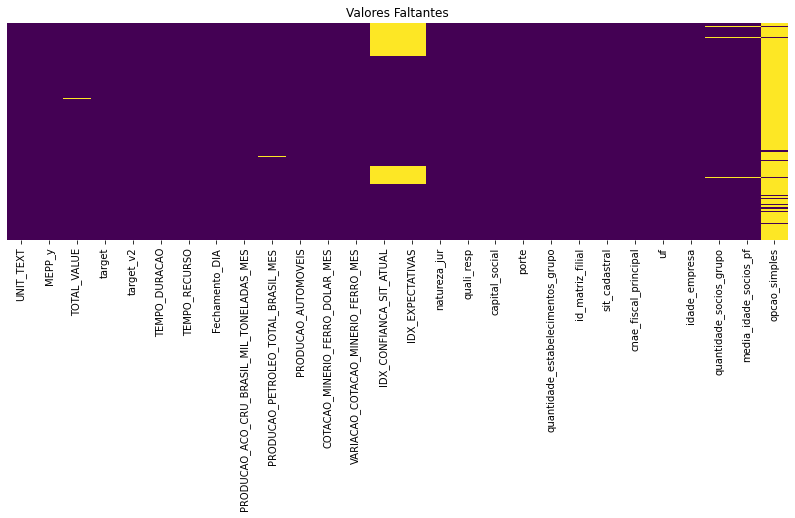

In [304]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,4))
sns.heatmap(df_tokens.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Valores Faltantes')

In [305]:
df_tokens.drop(df_tokens[df_tokens.TOTAL_VALUE.isna()].index, inplace=True)

In [306]:
df_tokens['opcao_simples'] = df_tokens['opcao_simples'].apply(lambda x: x if x=='S' else 'N')
df_tokens.media_idade_socios_pf.fillna(df_tokens.media_idade_socios_pf.mean(),inplace=True)
df_tokens.quantidade_socios_grupo.fillna(df_tokens.quantidade_socios_grupo.mean(),inplace=True)
df_tokens.IDX_CONFIANCA_SIT_ATUAL.fillna(df_tokens.IDX_CONFIANCA_SIT_ATUAL.mean(),inplace=True)
df_tokens.IDX_EXPECTATIVAS.fillna(df_tokens.IDX_EXPECTATIVAS.mean(),inplace=True)
df_tokens.PRODUCAO_PETROLEO_TOTAL_BRASIL_MES.fillna(df_tokens.PRODUCAO_PETROLEO_TOTAL_BRASIL_MES.mean(),inplace=True)

Text(0.5, 1.0, 'Valores Faltantes')

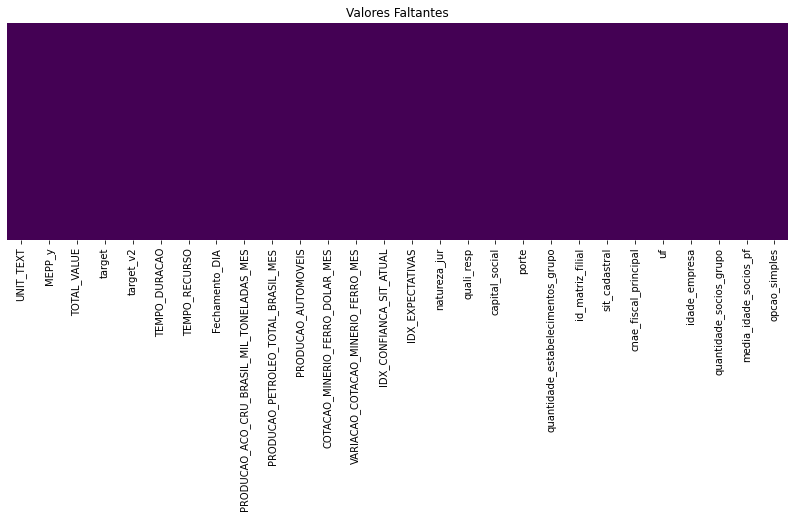

In [307]:
plt.figure(figsize=(14,4))
sns.heatmap(df_tokens.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Valores Faltantes')

In [308]:
df_tokens.to_excel('Dataset Final.xlsx')
df_tokens.to_pickle('Dataset.pkl')

In [309]:
df_tokens.COTACAO_MINERIO_FERRO_DOLAR_MES.dtype

dtype('float64')